載入模組

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

資料清洗

In [2]:
titanic_df =pd.read_csv('./Titanic_02.csv')
# titanic_df_duplicates = titanic_df.duplicated()
titanic_df['Age'] = titanic_df['Age'].replace('?', titanic_df['Age'].median)
titanic_df['Age'] = pd.to_numeric(titanic_df['Age'], errors='coerce')
men = titanic_df.loc[titanic_df['Sex']=='Male', 'Age'].dropna().tolist()
women = titanic_df.loc[titanic_df['Sex']=='Female', 'Age'].dropna().tolist()
men_women = [men, women]
print(men_women)
print(men)
print(women)

[[0.9167, 30.0, 48.0, 39.0, 71.0, 47.0, 80.0, 24.0, 36.0, 37.0, 26.0, 25.0, 25.0, 28.0, 45.0, 40.0, 42.0, 41.0, 48.0, 45.0, 42.0, 36.0, 33.0, 28.0, 17.0, 11.0, 36.0, 49.0, 36.0, 46.0, 27.0, 45.0, 27.0, 47.0, 37.0, 70.0, 39.0, 51.0, 27.0, 31.0, 31.0, 53.0, 4.0, 50.0, 49.0, 39.0, 36.0, 30.0, 19.0, 64.0, 50.0, 43.0, 60.0, 37.0, 47.0, 24.0, 49.0, 71.0, 53.0, 38.0, 23.0, 46.0, 25.0, 48.0, 45.0, 40.0, 27.0, 55.0, 42.0, 55.0, 42.0, 35.0, 38.0, 49.0, 46.0, 50.0, 32.5, 58.0, 41.0, 42.0, 35.0, 42.0, 29.0, 30.0, 30.0, 19.0, 46.0, 54.0, 36.0, 28.0, 65.0, 44.0, 30.0, 55.0, 47.0, 37.0, 58.0, 64.0, 65.0, 28.5, 45.5, 23.0, 29.0, 18.0, 52.0, 47.0, 38.0, 22.0, 31.0, 45.0, 46.0, 36.0, 55.0, 33.0, 13.0, 61.0, 34.0, 35.0, 50.0, 56.0, 28.0, 56.0, 56.0, 24.0, 24.0, 6.0, 45.0, 57.0, 32.0, 62.0, 54.0, 67.0, 61.0, 52.0, 48.0, 49.0, 17.0, 31.0, 40.0, 61.0, 47.0, 64.0, 60.0, 54.0, 21.0, 57.0, 50.0, 27.0, 51.0, 21.0, 62.0, 30.0, 30.0, 18.0, 25.0, 34.0, 57.0, 18.0, 23.0, 28.0, 51.0, 32.0, 28.0, 1.0, 34.0, 23.0, 26.

敘述統計

In [3]:
# 男性 
men_values = np.array(men)
print('Age of men: median = ', np.median(men_values))
print('Age of men: Q1 = ', np.quantile(men_values, 0.25))
print('Age of men: Q2 = ', np.quantile(men_values, 0.5))
print('Age of men: Q3 = ', np.quantile(men_values, 0.75))
print('Age of men: IQR = ', np.quantile(men_values, 0.75) - np.quantile(men_values, 0.25))
print('Age of men: max = ', np.max(men_values))
print('Age of men: min = ', np.min(men_values))
print('Age of men: upper = ', np.quantile(men_values, 0.75) + 1.5 * (np.quantile(men_values, 0.75) - np.quantile(men_values, 0.25)))
print('Age of men: lower = ', np.quantile(men_values, 0.75) - 1.5 * (np.quantile(men_values, 0.75) - np.quantile(men_values, 0.25)))

Age of men: median =  28.0
Age of men: Q1 =  21.0
Age of men: Q2 =  28.0
Age of men: Q3 =  39.0
Age of men: IQR =  18.0
Age of men: max =  80.0
Age of men: min =  0.3333
Age of men: upper =  66.0
Age of men: lower =  12.0


In [4]:
# 女性
women_values = np.array(women)
print('Age of women: median = ', np.median(women_values))
print('Age of women: Q1 = ', np.quantile(women_values, 0.25))
print('Age of women: Q2 = ', np.quantile(women_values, 0.5))
print('Age of women: Q3 = ', np.quantile(women_values, 0.75))
print('Age of women: IQR = ', np.quantile(women_values, 0.75) - np.quantile(women_values, 0.25))
print('Age of women: max = ', np.max(women_values))
print('Age of women: min = ', np.min(women_values))
print('Age of women: upper = ', np.quantile(women_values, 0.75) + 1.5 * (np.quantile(women_values, 0.75) - np.quantile(women_values, 0.25)))
print('Age of women: lower = ', np.quantile(women_values, 0.75) - 1.5 * (np.quantile(women_values, 0.75) - np.quantile(men_values, 0.25)))

Age of women: median =  27.0
Age of women: Q1 =  19.0
Age of women: Q2 =  27.0
Age of women: Q3 =  38.0
Age of women: IQR =  19.0
Age of women: max =  76.0
Age of women: min =  0.1667
Age of women: upper =  66.5
Age of women: lower =  12.5


盒狀圖

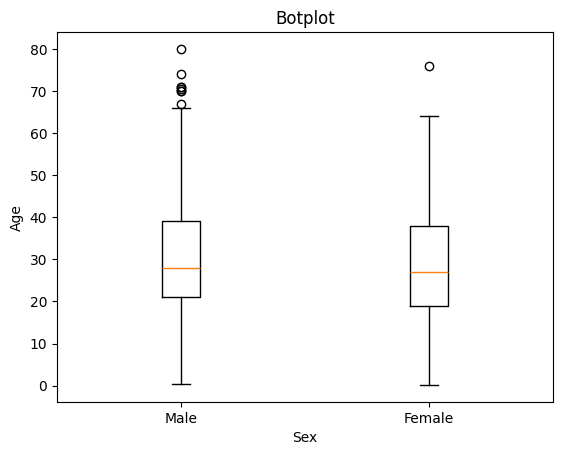

In [5]:
plt.boxplot(men_women)
plt.xticks([1, 2], ["Male", "Female"])
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Botplot')
plt.show()

常態分配圖

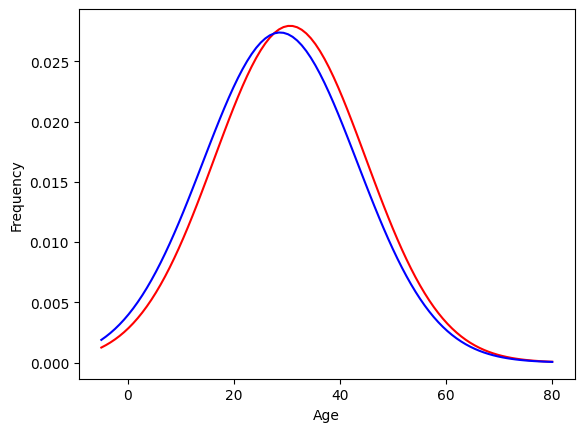

In [6]:
men_μ = np.mean(men_values)
women_μ = np.mean(women_values)
men_std = np.std(men_values)
women_std = np.std(women_values)
x = np.linspace(-5, 80, 100)
plt.plot(x,stats.norm.pdf(x, men_μ, men_std),'r')
plt.plot(x,stats.norm.pdf(x, women_μ, women_std),'b')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()